In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as scisig
import scipy.optimize as opt

In [76]:
data = sio.loadmat('D:/Temporary data storage/Diamond/240522/Dipole Measurement/tt (2).mat')

In [77]:
z = np.transpose(data['D'])[0]

PSDz = scisig.welch(z, fs = 10**6, nperseg = 10**6)

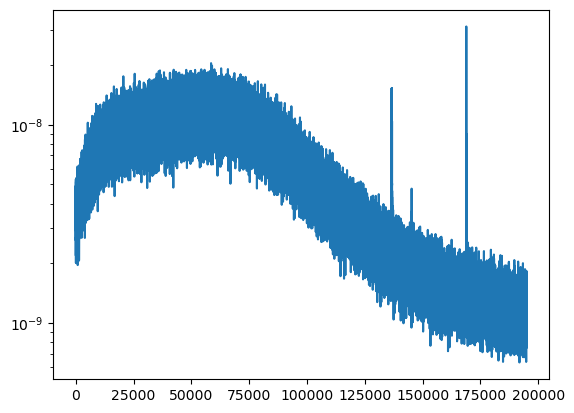

In [78]:
plt.plot(PSDz[1][5000:200000])
plt.yscale('log')

In [325]:
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=3):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=3):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

def R2_func(w, y, A, c):
    return A/(w**2+y**2) +c

def Linewidth(w, A, w0, y, c):
    return A/((w**2-w0**2)**2 + w**2*y**2)+c

In [319]:
filename = 'C:/Users/yuhan/Documents/Data/linewidth/240522/Cooling/0_2/tt ('
files = [1, 2, 3, 4, 5]
end = ').mat'

In [321]:
data = sio.loadmat(filename+str(1)+end)
z = np.transpose(data['C'])[0]
#zf = butter_bandpass_filter(z, 60000, 72000, 10**6, 3)
PSDz = scisig.welch(z, fs = 10**6, nperseg = 10**6)
#lb = 50000
#ub = 85000
#area = np.trapz(PSDz[1][lb:ub], PSDz[0][lb:ub]) - (ub-lb)*4*10**(-10)

data = sio.loadmat(filename+str(1)+end)
y = np.transpose(data['A'])[0]
#zf = butter_bandpass_filter(z, 60000, 72000, 10**6, 3)
PSDy = scisig.welch(y, fs = 10**6, nperseg = 10**6)
#lb = 0
#ub = 10000
#area2 = np.trapz(PSDz2[1][lb:ub], PSDz2[0][lb:ub]) - (ub-lb)*6*10**(-10)

In [322]:
lbz = 20000
ubz = 200000
fitz, cov = opt.curve_fit(Linewidth, PSDz[0][lbz:ubz], PSDz[1][lbz:ubz], p0 = [10**(11), 65000, 4000, 3*10**(-8)])
fittedz = Linewidth(PSDz[0], *fitz)
print(fitz[2])

lbx = 200000
ubx = 300000
fitx, cov = opt.curve_fit(Linewidth, PSDz[0][lbx:ubx], PSDz[1][lbx:ubx], p0 = [10**(11), 250000, 4000, 3*10**(-8)])
fittedx = Linewidth(PSDz[0], *fitx)
print(fitx[2])

lby = 300000
uby = 400000
fity, cov = opt.curve_fit(Linewidth, PSDy[0][lby:uby], PSDy[1][lby:uby], p0 = [10**(11), 350000, 4000, 3*10**(-8)])
fittedy = Linewidth(PSDy[0], *fity)
print(fity[2])

424.18980279523356
1048.6284146349628
896.6877086817727


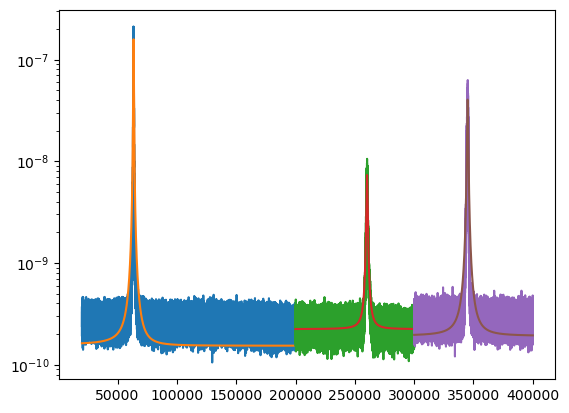

In [323]:
plt.plot(PSDz[0][lbz:ubz], PSDz[1][lbz:ubz])
plt.plot(PSDz[0][lbz:ubz], fittedz[lbz:ubz])
plt.plot(PSDz[0][lbx:ubx], PSDz[1][lbx:ubx])
plt.plot(PSDz[0][lbx:ubx], fittedx[lbx:ubx])
plt.plot(PSDy[0][lby:uby], PSDy[1][lby:uby])
plt.plot(PSDy[0][lby:uby], fittedy[lby:uby])
plt.yscale('log')

77.21953521828006
116.4828029313273
86.61105162193611


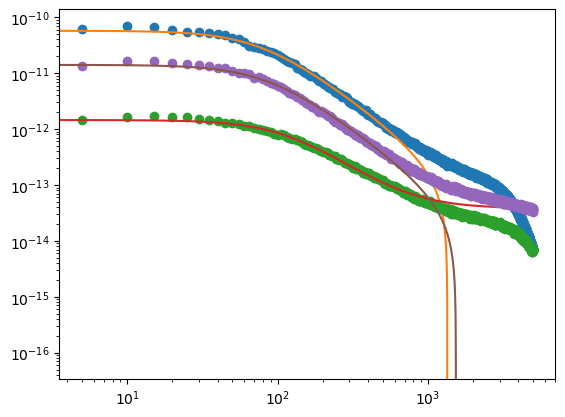

In [326]:
PSDz2_amp = np.zeros(100001)
PSDx2_amp = np.zeros(100001)
PSDy2_amp = np.zeros(100001)
for n, i in enumerate(files):
    data = sio.loadmat(filename+str(i)+end)
    z = np.transpose(data['C'])[0]
    zf = butter_bandpass_filter(z, 60000, 68000, 10**6, 3)
    z2 = zf**2
    PSDz2 = scisig.welch(z2, fs = 10**6, nperseg = 2*10**5)
    PSDz2_amp += PSDz2[1]

    z = np.transpose(data['B'])[0]
    zf = butter_bandpass_filter(z, 255000, 265000, 10**6, 3)
    z2 = zf**2
    PSDz2 = scisig.welch(z2, fs = 10**6, nperseg = 2*10**5)
    PSDx2_amp += PSDz2[1]

    z = np.transpose(data['A'])[0]
    zf = butter_bandpass_filter(z, 340000, 360000, 10**6, 3)
    z2 = zf**2
    PSDz2 = scisig.welch(z2, fs = 10**6, nperseg = 2*10**5)
    PSDy2_amp += PSDz2[1]

PSDz2_amp /= 5
PSDx2_amp /= 5
PSDy2_amp /= 5

PSD_freq = PSDz2[0]
fitz, cov = opt.curve_fit(R2_func, PSD_freq[:200]*2*np.pi, PSDz2_amp[:200], p0 = [200, 4*10**(-6), 10**(-14)])
fitx, cov = opt.curve_fit(R2_func, PSD_freq[:200]*2*np.pi, PSDx2_amp[:200], p0 = [200, 4*10**(-6), 10**(-14)])
fity, cov = opt.curve_fit(R2_func, PSD_freq[:200]*2*np.pi, PSDy2_amp[:200], p0 = [200, 2*10**(-6), 10**(-14)])
fittedz = R2_func(PSD_freq*2*np.pi, *fitz)
fittedx = R2_func(PSD_freq*2*np.pi, *fitx)
fittedy = R2_func(PSD_freq*2*np.pi, *fity)
print(fitz[0]/2/np.pi)
print(fitx[0]/2/np.pi)
print(fity[0]/2/np.pi)

plt.figure()
plt.plot(PSD_freq[:1000], PSDz2_amp[:1000], 'o')
plt.plot(PSD_freq[:1000], fittedz[:1000])
plt.plot(PSD_freq[:1000], PSDx2_amp[:1000], 'o')
plt.plot(PSD_freq[:1000], fittedx[:1000])
plt.plot(PSD_freq[:1000], PSDy2_amp[:1000], 'o')
plt.plot(PSD_freq[:1000], fittedy[:1000])
plt.yscale('log')
plt.xscale('log')

-39.686096838667765
64.96266566604397
58.84385271291298
-39.18406115701912
65.49182404623714
66.26009286859586
-40.28793611217513
75.672634946534
84.14729247899706
-47.246187022665964
90.66895388157066
113.48149419575283
-59.403151327797964
55.33068396850457
52.43072238844874
-27.092966860989552
59.410411081420335
55.34373897323259
-170.74288913538166
63.074105075071614
49.86699238507968


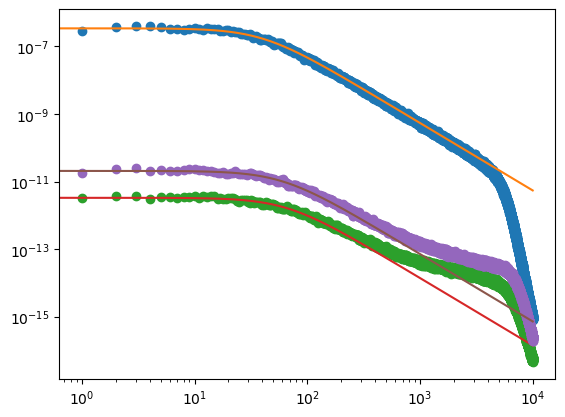

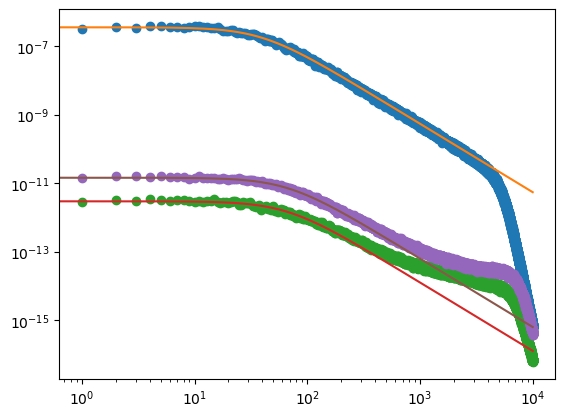

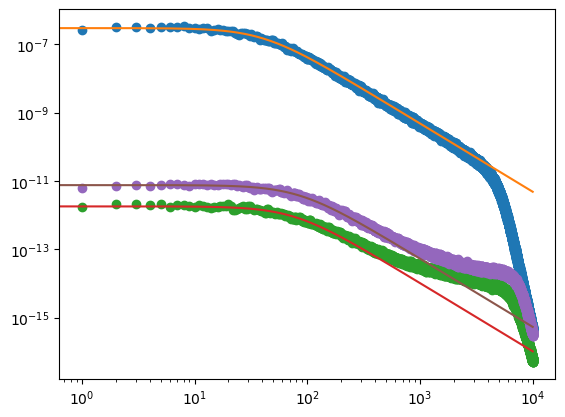

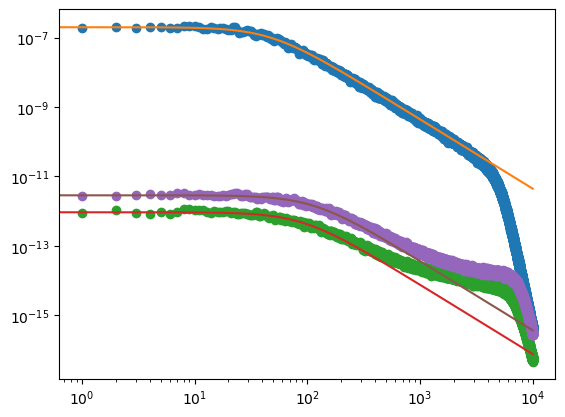

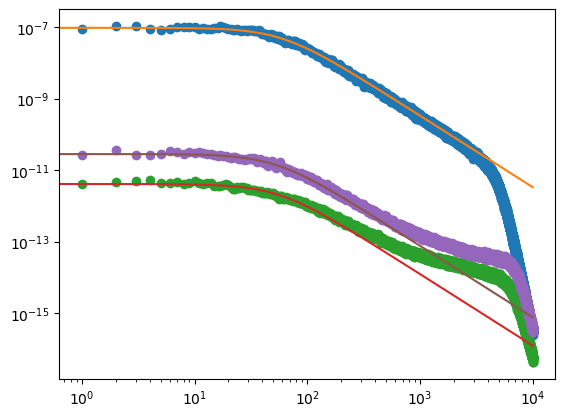

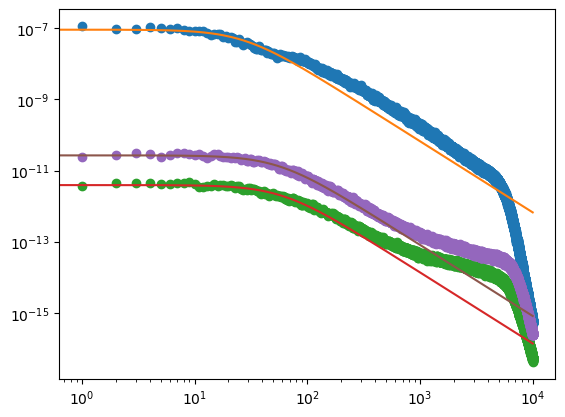

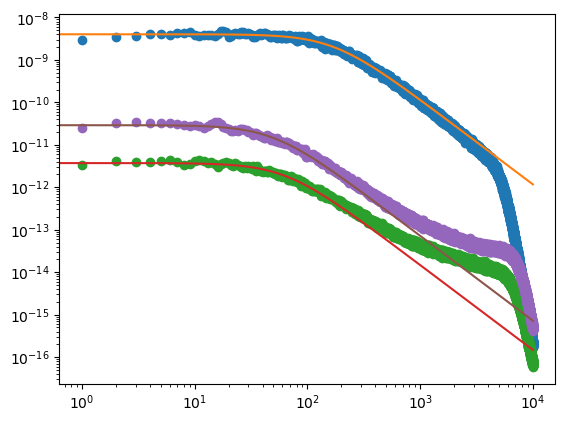

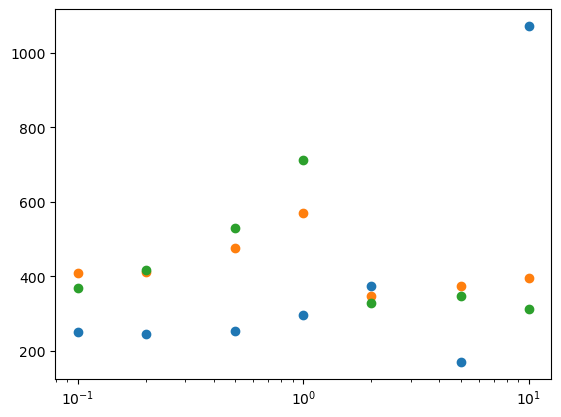

In [311]:
gains = [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10]
yz = np.zeros(len(gains))
yx = np.zeros(len(gains))
yy = np.zeros(len(gains))
for m, j in enumerate(gains):
    if j == 2.0:
        filename = 'C:/Users/yuhan/Documents/Data/linewidth/240517/0.076 mbar/G ' + str(j) + ' 2/tt ('
    elif j == 5.0:
        filename = 'C:/Users/yuhan/Documents/Data/linewidth/240517/0.076 mbar/G ' + str(j) + ' 3/tt ('
    else:
        filename = 'C:/Users/yuhan/Documents/Data/linewidth/240517/0.076 mbar/G ' + str(j) + '/tt ('
    PSDz2_amp = np.zeros(500001)
    PSDx2_amp = np.zeros(500001)
    PSDy2_amp = np.zeros(500001)
    for n, i in enumerate(files):
        data = sio.loadmat(filename+str(i)+end)
        z = np.transpose(data['D'])[0]
        zf = butter_bandpass_filter(z, 60000, 68000, 10**6, 3)
        z2 = zf**2
        PSDz2 = scisig.welch(z2, fs = 10**6, nperseg = 10**6)
        PSDz2_amp += PSDz2[1]

        z = np.transpose(data['B'])[0]
        zf = butter_bandpass_filter(z, 245000, 255000, 10**6, 3)
        z2 = zf**2
        PSDz2 = scisig.welch(z2, fs = 10**6, nperseg = 10**6)
        PSDx2_amp += PSDz2[1]

        z = np.transpose(data['A'])[0]
        zf = butter_bandpass_filter(z, 335000, 345000, 10**6, 3)
        z2 = zf**2
        PSDz2 = scisig.welch(z2, fs = 10**6, nperseg = 10**6)
        PSDy2_amp += PSDz2[1]

    PSDz2_amp /= 5
    PSDx2_amp /= 5
    PSDy2_amp /= 5

    PSD_freq = PSDz2[0]
    fitz, cov = opt.curve_fit(R2_func, PSD_freq[:200]*2*np.pi, PSDz2_amp[:200], p0 = [200, 4*10**(-6)])
    fitx, cov = opt.curve_fit(R2_func, PSD_freq[:200]*2*np.pi, PSDx2_amp[:200], p0 = [200, 4*10**(-6)])
    fity, cov = opt.curve_fit(R2_func, PSD_freq[:200]*2*np.pi, PSDy2_amp[:200], p0 = [200, 2*10**(-6)])
    fittedz = R2_func(PSD_freq*2*np.pi, *fitz)
    fittedx = R2_func(PSD_freq*2*np.pi, *fitx)
    fittedy = R2_func(PSD_freq*2*np.pi, *fity)
    print(fitz[0]/2/np.pi)
    print(fitx[0]/2/np.pi)
    print(fity[0]/2/np.pi)

    yz[m] = abs(fitz[0])
    yx[m] = abs(fitx[0])
    yy[m] = abs(fity[0])

    plt.figure()
    plt.plot(PSD_freq[:10000], PSDz2_amp[:10000], 'o')
    plt.plot(PSD_freq[:10000], fittedz[:10000])
    plt.plot(PSD_freq[:10000], PSDx2_amp[:10000], 'o')
    plt.plot(PSD_freq[:10000], fittedx[:10000])
    plt.plot(PSD_freq[:10000], PSDy2_amp[:10000], 'o')
    plt.plot(PSD_freq[:10000], fittedy[:10000])
    plt.yscale('log')
    plt.xscale('log')

plt.figure()
plt.plot(gains, yz, 'o')
plt.plot(gains, yx, 'o')
plt.plot(gains, yy, 'o')
plt.xscale('log')

-35.479013426670186
63.298440820957275
57.73299914899501
-183.18269545101722
260.9341255642787
222.96243216520725
509.68947976555137
760.4756548197619
606.336389263207
1783.3126955204407
3085.327707631329
2136.5171200348327
6150.974648560757
9857.192479454652
7304.141144252084


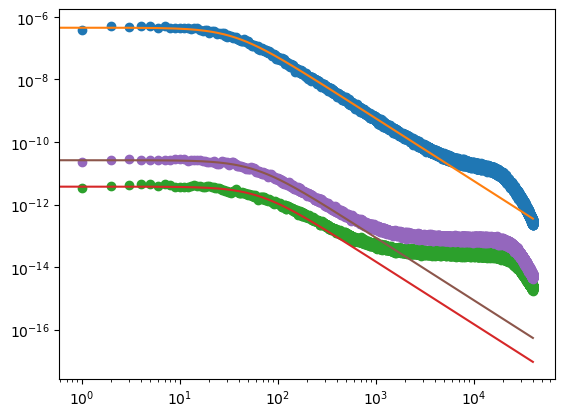

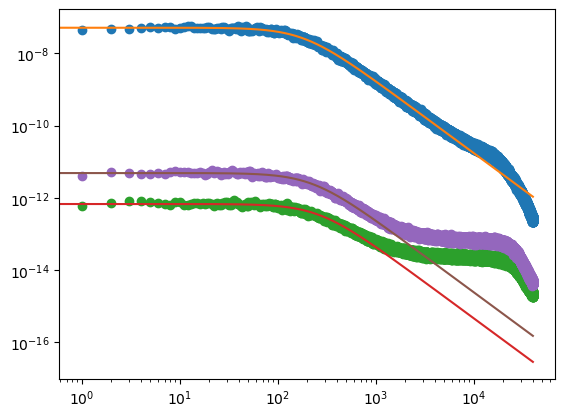

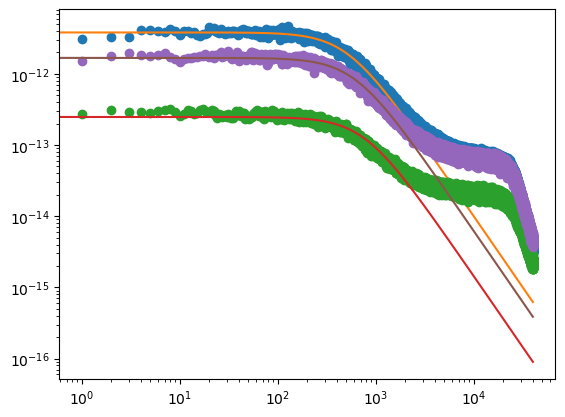

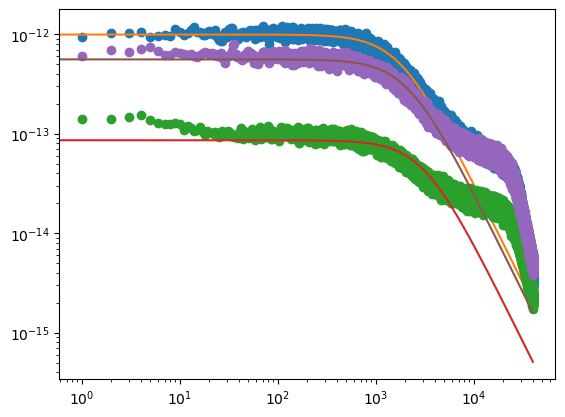

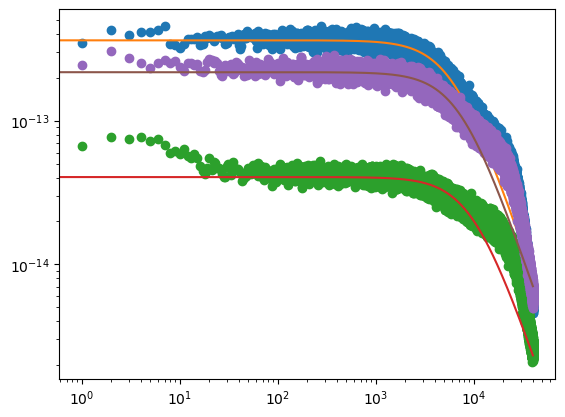

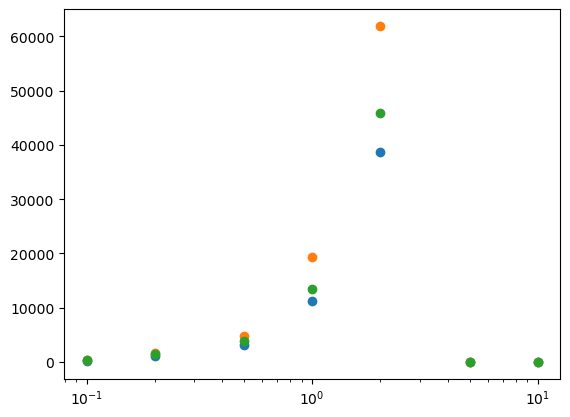

In [85]:
press = [0.076, 0.22, 0.56, 1.6, 5.0]
yz = np.zeros(len(gains))
yx = np.zeros(len(gains))
yy = np.zeros(len(gains))
for m, j in enumerate(press):
    if j == 0.076:
        filename = 'C:/Users/yuhan/Documents/Data/linewidth/240517/' + str(j) + ' mbar/No feedback 4/tt ('
    else:
        filename = 'C:/Users/yuhan/Documents/Data/linewidth/240517/' + str(j) + ' mbar/tt ('
    PSDz2_amp = np.zeros(500001)
    PSDx2_amp = np.zeros(500001)
    PSDy2_amp = np.zeros(500001)
    for n, i in enumerate(files):
        data = sio.loadmat(filename+str(i)+end)
        if j < 0.3:
            z = np.transpose(data['D'])[0]
        else:
            z = np.transpose(data['C'])[0]
        zf = butter_bandpass_filter(z, 65000-30000, 65000+30000, 10**6, 3)
        z2 = zf**2
        PSDz2 = scisig.welch(z2, fs = 10**6, nperseg = 10**6)
        PSDz2_amp += PSDz2[1]

        z = np.transpose(data['B'])[0]
        zf = butter_bandpass_filter(z, 250000-30000, 250000+30000, 10**6, 3)
        z2 = zf**2
        PSDz2 = scisig.welch(z2, fs = 10**6, nperseg = 10**6)
        PSDx2_amp += PSDz2[1]

        z = np.transpose(data['A'])[0]
        zf = butter_bandpass_filter(z, 340000-30000, 340000+30000, 10**6, 3)
        z2 = zf**2
        PSDz2 = scisig.welch(z2, fs = 10**6, nperseg = 10**6)
        PSDy2_amp += PSDz2[1]

    PSDz2_amp /= 5
    PSDx2_amp /= 5
    PSDy2_amp /= 5

    PSD_freq = PSDz2[0]
    fitz, cov = opt.curve_fit(R2_func, PSD_freq[:2000*(m+1)]*2*np.pi, PSDz2_amp[:2000*(m+1)], p0 = [200, 4*10**(-6)])
    fitx, cov = opt.curve_fit(R2_func, PSD_freq[:2000*(m+1)]*2*np.pi, PSDx2_amp[:2000*(m+1)], p0 = [200, 4*10**(-6)])
    fity, cov = opt.curve_fit(R2_func, PSD_freq[:2000*(m+1)]*2*np.pi, PSDy2_amp[:2000*(m+1)], p0 = [200, 2*10**(-6)])
    fittedz = R2_func(PSD_freq*2*np.pi, *fitz)
    fittedx = R2_func(PSD_freq*2*np.pi, *fitx)
    fittedy = R2_func(PSD_freq*2*np.pi, *fity)
    print(fitz[0]/2/np.pi)
    print(fitx[0]/2/np.pi)
    print(fity[0]/2/np.pi)

    yz[m] = abs(fitz[0])
    yx[m] = abs(fitx[0])
    yy[m] = abs(fity[0])

    plt.figure()
    plt.plot(PSD_freq[:40000], PSDz2_amp[:40000], 'o')
    plt.plot(PSD_freq[:40000], fittedz[:40000])
    plt.plot(PSD_freq[:40000], PSDx2_amp[:40000], 'o')
    plt.plot(PSD_freq[:40000], fittedx[:40000])
    plt.plot(PSD_freq[:40000], PSDy2_amp[:40000], 'o')
    plt.plot(PSD_freq[:40000], fittedy[:40000])
    plt.yscale('log')
    plt.xscale('log')

plt.figure()
plt.plot(gains, yz, 'o')
plt.plot(gains, yx, 'o')
plt.plot(gains, yy, 'o')
plt.xscale('log')

In [84]:
PSDz2_amp[:2000]

array([7.02343326e-08, 3.71754655e-07, 4.92669308e-07, ...,
       1.49204068e-10, 1.24476537e-10, 1.39639964e-10])